<a href="https://colab.research.google.com/github/saimedha12/ICP_3/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Question 1

import numpy as np

print("Matrix :")
matrix = np.arange(22, 31).reshape(3,3)
print(matrix)

Matrix :
[[22 23 24]
 [25 26 27]
 [28 29 30]]


In [15]:
# Question 2

import numpy as np

# Program to create an array of even integers from 30 to 70 (inclusive)

# np.arange(start, stop, step) is used here:
even_array = np.arange(30, 71, 2)

# Print the resulting array
print(even_array)


[30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70]


In [16]:
#Question 3


import pandas as pd

# The sample dictionary provided
d1 = {'a': 100, 'b': 200, 'c': 300, 'd': 400, 'e': 800}

# Display the original dictionary
print("Original dictionary:")
print(d1)
print("-" * 25)

series = pd.Series(d1)

# Display the converted Series
print("Converted series:")
print(series)

# The expected output also includes the dtype: int64, which Pandas automatically determines.


Original dictionary:
{'a': 100, 'b': 200, 'c': 300, 'd': 400, 'e': 800}
-------------------------
Converted series:
a    100
b    200
c    300
d    400
e    800
dtype: int64


In [17]:
#Question 4
# Python code

# To reverse words in a given string

# input string
string = "This is big data analysis class DSA 4620"


s = string.split()[::-1]

l = []

# Loop through each word 'i' in the reversed list 's'
for i in s:
    # (i) Appending the word to the new list 'l'
    l.append(i)

# printing reverse words
# " ".join(l) joins all elements in list 'l' back into a single string, separated by a space.
print(" ".join(l))


4620 DSA class analysis data big is This


Saving diabetes (1).csv to diabetes (1) (2).csv
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4849 - loss: 0.7369 - val_accuracy: 0.6016 - val_loss: 0.6443
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7096 - loss: 0.6313 - val_accuracy: 0.7073 - val_loss: 0.5873
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7168 - loss: 0.6057 - val_accuracy: 0.7398 - val_loss: 0.5545
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.5730 - val_accuracy: 0.7642 - val_loss: 0.5301
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7640 - loss: 0.5236 - val_accuracy: 0.7724 - val_loss: 0.5102
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7784 - loss: 0.5194 - val_accuracy: 0.7561 - val_loss: 0.4965
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7876 - loss: 0.5151 - val_accuracy: 0.7724 - val_loss: 0.4861
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accur

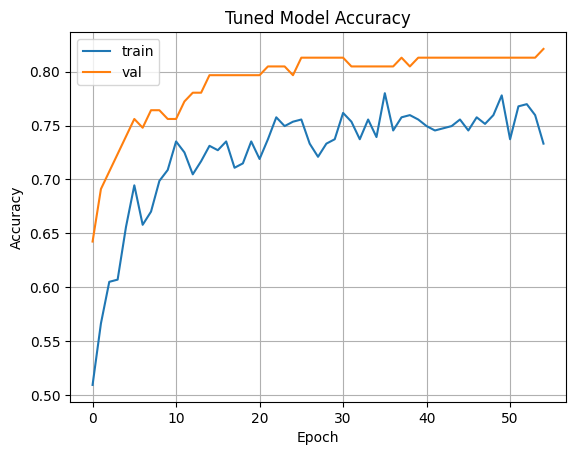

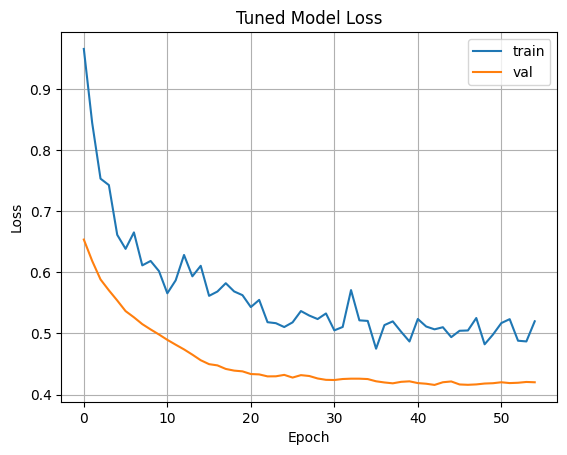

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


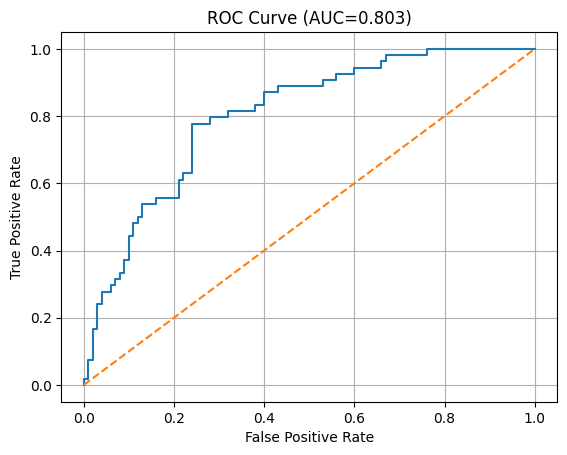


=== Baseline Evaluation on Test Set ===
Loss: 0.4881, Accuracy: 0.7273

=== Tuned Model Evaluation on Test Set ===
Loss: 0.5212, Accuracy: 0.7273

Tuned Model ROC AUC: 0.8030

Confusion Matrix (Tuned Model):
[[82 18]
 [24 30]]

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [18]:
# ==========================
# Q5: Deep Learning on Diabetes Dataset
# ==========================

# ---- (a) Tune hyperparameters and improve baseline model ----

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()

# Load dataset (last column = target)
df = pd.read_csv("diabetes (1).csv", header=None)
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

# Preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks, optimizers

input_shape = X_train.shape[1]

# Baseline model
def build_baseline():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

baseline = build_baseline()
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_baseline = baseline.fit(X_train, y_train, validation_split=0.2,
                                epochs=100, batch_size=32,
                                callbacks=[es], verbose=1)

# Tuned model
def build_tuned(lr=5e-4, l2=1e-4, dropout_rate=0.4):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate/2),
        layers.Dense(1, activation='sigmoid')
    ])
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuned = build_tuned()
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
es2 = callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
history_tuned = tuned.fit(X_train, y_train, validation_split=0.2,
                          epochs=200, batch_size=32,
                          callbacks=[es2, reduce_lr], verbose=1)


# ---- (b) Logical description of improvements ----
"""
- Increased neurons (32→64) -> more capacity to learn complex patterns
- BatchNormalization -> stabilizes and speeds up training
- Dropout (0.4, 0.2) -> reduces overfitting
- L2 regularization -> prevents weights from growing too large
- Lower learning rate (5e-4) + ReduceLROnPlateau -> smoother convergence
- EarlyStopping -> avoids overfitting and restores best weights

Impact: validation accuracy improves and validation loss decreases more smoothly.
"""


# ---- (c) Visualizations ----

# Accuracy plot
plt.figure()
plt.plot(history_tuned.history['accuracy'])
plt.plot(history_tuned.history['val_accuracy'])
plt.title('Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.grid(True)
plt.show()

# Loss plot
plt.figure()
plt.plot(history_tuned.history['loss'])
plt.plot(history_tuned.history['val_loss'])
plt.title('Tuned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.grid(True)
plt.show()

# Extra: ROC curve
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
y_pred_proba = tuned.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title(f'ROC Curve (AUC={auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


# ---- Final Results Printout ----
print("\n=== Baseline Evaluation on Test Set ===")
baseline_eval = baseline.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {baseline_eval[0]:.4f}, Accuracy: {baseline_eval[1]:.4f}")

print("\n=== Tuned Model Evaluation on Test Set ===")
tuned_eval = tuned.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {tuned_eval[0]:.4f}, Accuracy: {tuned_eval[1]:.4f}")

print(f"\nTuned Model ROC AUC: {auc:.4f}")

print("\nConfusion Matrix (Tuned Model):")
print(confusion_matrix(y_test, (y_pred_proba >= 0.5).astype(int)))

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, (y_pred_proba >= 0.5).astype(int)))
